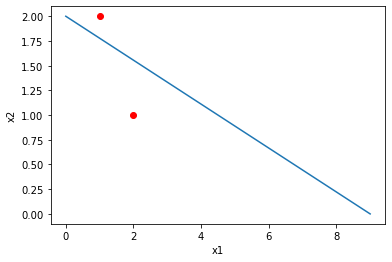

[ 0.4  1.8 -3.6]


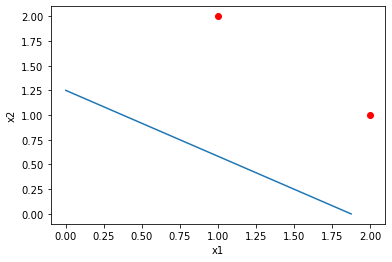

[ 1.6  2.4 -3. ]


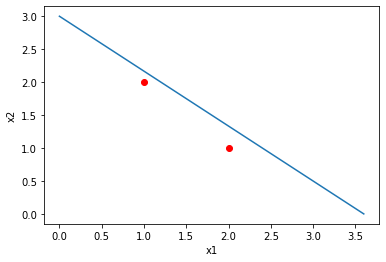

[ 1.   1.2 -3.6]


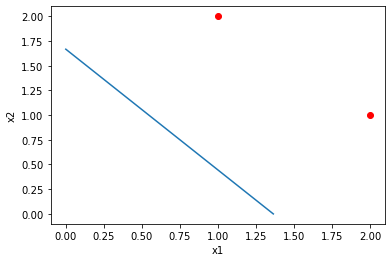

[ 2.2  1.8 -3. ]


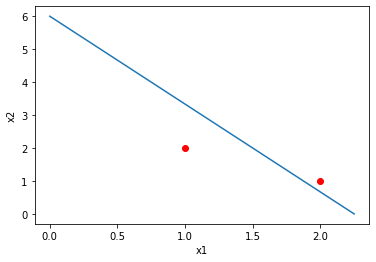

[ 1.6  0.6 -3.6]


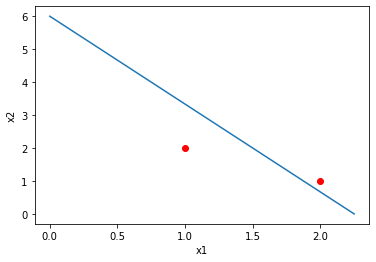

[ 1.6  0.6 -3.6]


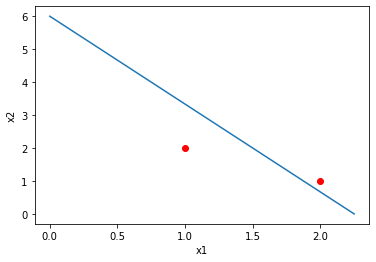

[ 1.6  0.6 -3.6]


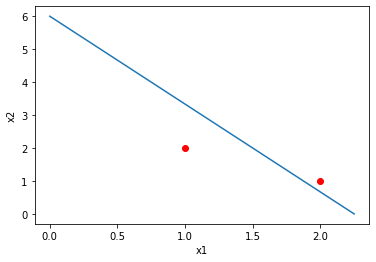

[ 1.6  0.6 -3.6]


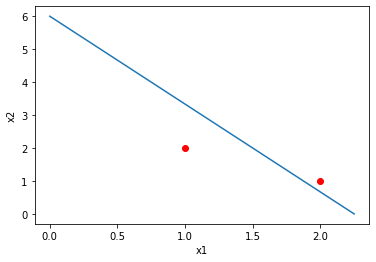

[ 1.6  0.6 -3.6]


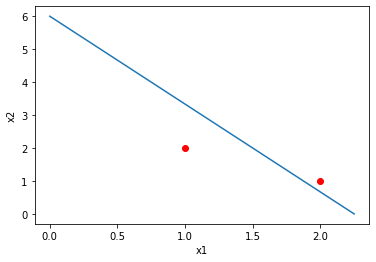

[ 1.6  0.6 -3.6]


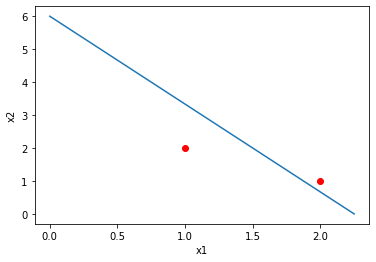

[ 1.6  0.6 -3.6]


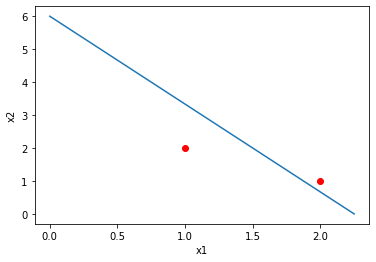

[ 1.6  0.6 -3.6]


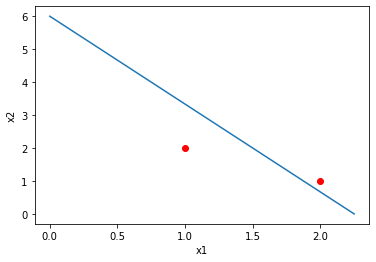

[ 1.6  0.6 -3.6]


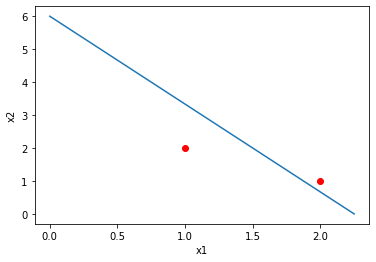

[ 1.6  0.6 -3.6]


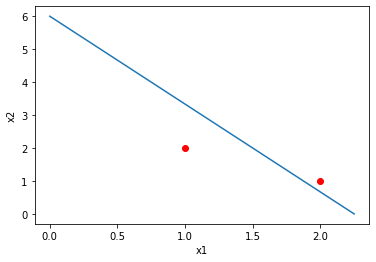

[ 1.6  0.6 -3.6]


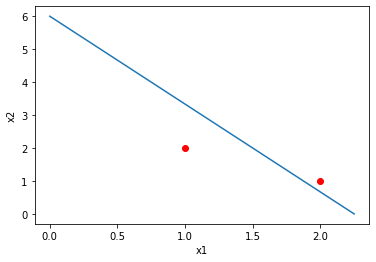

[ 1.6  0.6 -3.6]


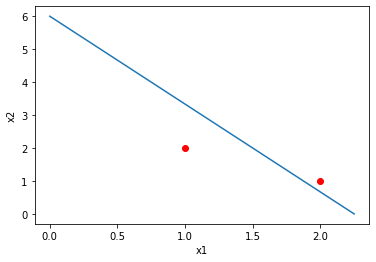

[ 1.6  0.6 -3.6]


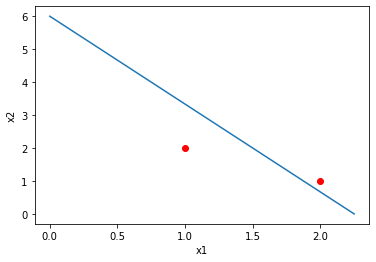

[ 1.6  0.6 -3.6]


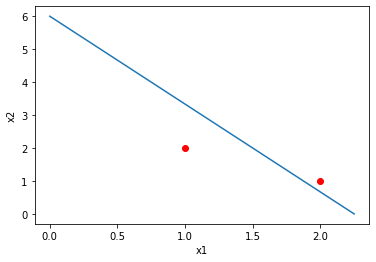

[ 1.6  0.6 -3.6]


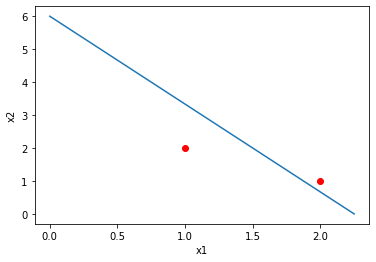

[ 1.6  0.6 -3.6]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
"""
Build a Single Neuron Perceptron
(1,2) -> label:-1
(2,1) -> label:1
"""
def train(epochs, learning_rate, trainingData):
    W = [1, 3, -3]
    nonErrorTimes = 0
    for i in range(epochs):
        error = 0
        for j in trainingData:
                temp = j
                #X: store the value of x1 and x2, [x1,x2]
                X = temp[:2]
                #arr: c
                arr = [temp[-2]]

                #combine [x1, x2] and [c]
                X = np.concatenate((X, arr))

                #store the label value in Array t
                t = temp[-1]

                #store the value of X * transpose(W) into C, C =  w1*x1 + w2*x2 + w3*c
                C = np.dot(X,np.transpose(W))

                #put C into sign function, if C >= 0, return 1 to y, else return -1 to y.
                #And y is the prediction value.
                y = sign(C)

                #learning algorithm for weights: Wi = Wi + learning_rate * (label value - prediction value) * Xi
                W = W + (learning_rate * (t - y)) * X

                #if (label value - prediction value) not equal to 0, means that the prediction is wrong
                #error = error +1
                if (t-y)!=0:
                    error = error + 1

                """plot"""
                # plot w1*x1 + w2*x2 + w3*c = 0 ,
                plt.plot([0, (-W[2]/W[0])],[(-W[2]/W[1]),0])
                # plot example points
                plt.plot([1, 2], [2, 1], 'ro')
                # axis X is X1
                plt.xlabel('x1')
                # axis Y is X2
                plt.ylabel('x2')
                plt.show()
                print(W)

                #error = 0 means that there is no wrong prediction in this iteration.
                if error == 0:
                    nonErrorTimes = nonErrorTimes + 1
                #if there are 100 iterations without errors, jump out the train loop.
                if nonErrorTimes == 100:
                    break

def sign(C):
    if C >= 0:
        return 1
    else:
        return -1
    
train(epochs = 10, learning_rate = 0.3, trainingData = [[1,2,1,-1], [2,1,1,1]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


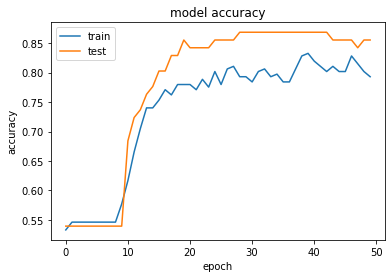

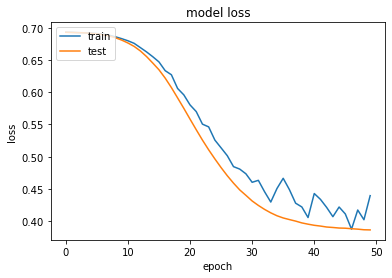

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
data = pd.read_csv("heart.csv", header = 0)
data.info()
data.isnull().sum()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = data.drop('target', axis=1)
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

scaler = MinMaxScaler(feature_range = (0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

model = Sequential()
model.add(Dense(13, input_dim = 13, kernel_initializer ='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 30, epochs = 50, validation_data = (X_test, y_test), verbose = 0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()